# WITH PANDAS AND MATPLOTLIB

In [1]:
# Libraries for analysis
import numpy as np 
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [4]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
kill.shape

(2535, 14)

In [6]:
kill.size

35490

In [7]:
kill.isnull().sum().sum()

346

## 1: Plot number of people by gender

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [9]:
kill.gender.value_counts(dropna=False)

M    2428
F     107
Name: gender, dtype: int64

In [10]:
kill.gender.value_counts().index

Index(['M', 'F'], dtype='object')

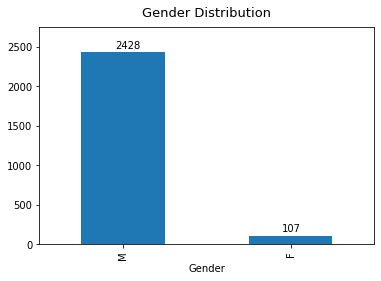

In [11]:
# with pandas

fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# ax = kill.gender.value_counts().plot(kind='bar')

ax.set_ylim(0, 2750)

ax.set_xlabel("Gender")
ax.set_title('Gender Distribution', pad=10, fontsize=13);

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50));

In [12]:
ax.patches

In [13]:
ax.patches[1]

In [14]:
ax.patches[1].get_x()

0.75

In [15]:
ax.patches[1].get_height()

107

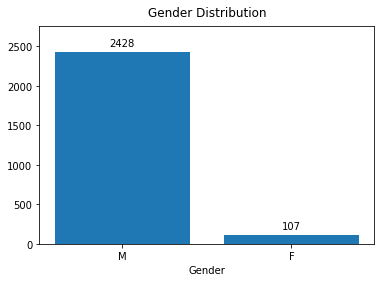

In [16]:
# with matplotlib-1

x = kill['gender'].value_counts().index
y = kill['gender'].value_counts()
# y = kill['gender'].value_counts().values

plt.bar(x, y)

for i in range(len(x)):
    plt.text(i, y[i]+50, y[i], ha='center', va='bottom')
  # plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.ylim(0, 2750)

plt.xlabel("Gender")

plt.title('Gender Distribution', pad=10)
plt.show()

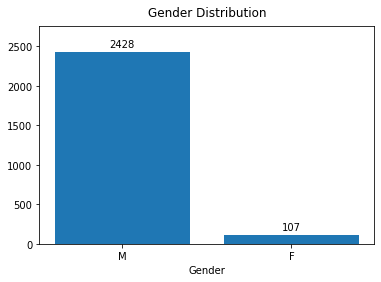

In [17]:
# with matplotlib-2

fig, ax = plt.subplots()

a = ax.bar(kill['gender'].value_counts().index, kill['gender'].value_counts().values)

ax.bar_label(a, padding=3)

ax.set_ylim(0, 2750)

ax.set_xlabel("Gender")
ax.set_title('Gender Distribution', pad=10);

## 2: Plot 7 most common kill weapons

In [18]:
kill['armed'].value_counts(dropna=False)[:7]
# kill['armed'].value_counts().nlargest(7, keep="last")

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [19]:
common_weapons = kill['armed'].value_counts(dropna=False)[:7]
common_weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [20]:
common_weapons.index

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object')

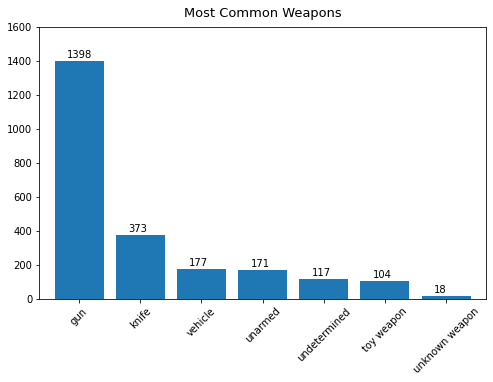

In [21]:
# with pandas

fig, ax = plt.subplots(figsize=(8,5))

common_weapons.plot(kind='bar',ax=ax, width=0.8)

ax.set_xticklabels(common_weapons.index, rotation=45)
ax.set_ylim(0, 1600)
ax.set_title('Most Common Weapons', pad=10, fontsize=13)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

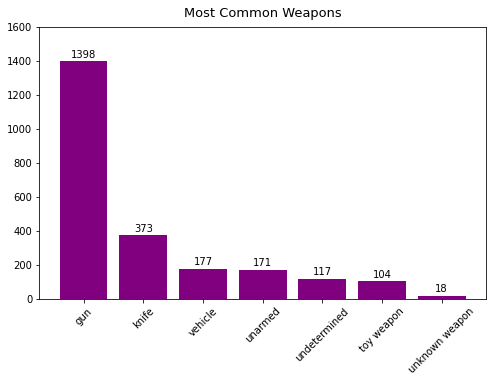

In [22]:
# with matplotlib

fig = plt.figure(figsize=(8,5))

x = common_weapons.index
y = common_weapons.values

plt.bar(x, y, color='purple')

for i in range(len(x)):
    plt.text(i, y[i]+10, y[i], ha='center', va='bottom')

plt.ylim(0, 1600)
plt.title('Most Common Weapons', pad=10, fontsize=13)    
plt.tick_params(axis='x', rotation=45)
plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [23]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


***method-1***

In [24]:
x = kill[kill['age'] < 25]['age']
y = kill[kill['age'] >= 25]['age']

In [25]:
kill['age_cat'] = kill['age'].replace((x, y), ('below25', 'above25')).fillna('unknown')

***method-2***

In [26]:
# kill['age_cat'] = kill.age.apply(lambda x : 'above25' if x >= 25 else ('below25' if x<25 else 'unknown'))

***method-3***

In [27]:
# kill['age_cat'] = ['above25' if x >= 25 else 'below25' if x < 25 else 'unknown' for x in kill.age]

In [28]:
kill['age_cat']

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531    unknown
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [29]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [30]:
kill['age_cat'].value_counts()

above25    2008
below25     450
unknown      77
Name: age_cat, dtype: int64

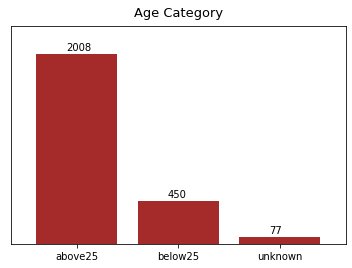

In [31]:
# with pandas

ax = kill.age_cat.value_counts().plot.bar(width=0.8, color='brown')

ax.set_ylim(0, 2300)
ax.set_xticklabels(kill.age_cat.value_counts().index, rotation=0)
ax.set_title('Age Category', pad=10, fontsize=13)

ax.yaxis.set_visible(False)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+40));

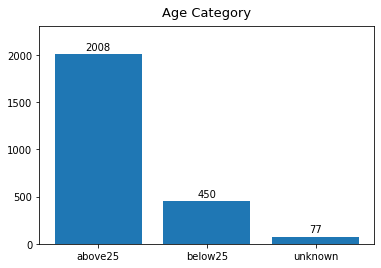

In [32]:
# with matplotlib

x = kill['age_cat'].value_counts().index
y = kill['age_cat'].value_counts().values

plt.bar(x, y)

for i in range(len(x)):
        plt.text(i, y[i]+20, y[i], ha='center', va='bottom')

plt.ylim(0, 2300)
plt.title('Age Category', pad=10, fontsize=13)    

plt.show()

## 4: Plot number of killed people by race

In [33]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

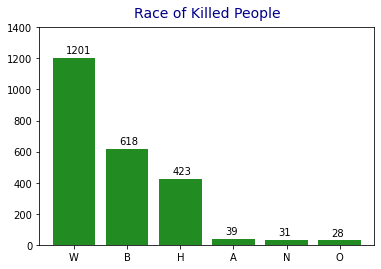

In [34]:
# with pandas

ax = race_freq.plot.bar(width=0.8, color='forestgreen')

ax.set_ylim(0, 1400)
ax.set_xticklabels(race_freq.index, rotation=0)
ax.set_title('Race of Killed People', color='darkblue', pad=10, fontsize=14)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+30));

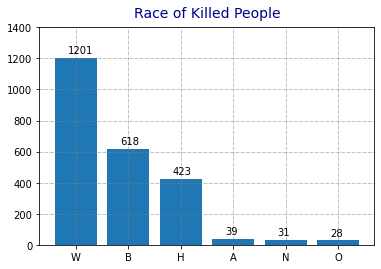

In [35]:
# with matplotlib

fig, ax = plt.subplots()

ax.bar(x=race_freq.index, height=race_freq.values)
ax.grid(visible=True, which='major', axis='both', color = "grey", linewidth = "0.5", linestyle = "-.")

ax.set_ylim(0, 1400)
ax.set_title('Race of Killed People', color='darkblue', pad=10, fontsize=14);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+30));

## 5: Killed People According to Races (Pie Chart)

In [36]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [37]:
kill['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [38]:
kill['race'].value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

***

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [39]:
kill.dropna(inplace=True)

In [40]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [41]:
kill['race'].value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [42]:
labels = kill['race'].value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [43]:
sizes = kill.race.value_counts().values
sizes

# np.array(kill['race'].value_counts().tolist())

array([1168,  592,  401,   36,   29,   28], dtype=int64)

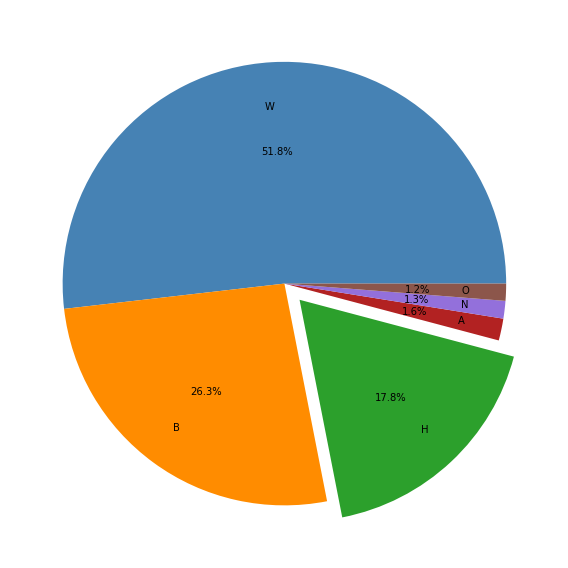

In [44]:
# matplotlib

plt.figure(figsize=(8,8))

col_list = ['steelblue', 'darkorange', 'tab:green', 'firebrick','mediumpurple', 'tab:brown']

plt.pie(sizes, labels=labels, colors=col_list, labeldistance=0.8, autopct='%.1f%%', explode=[0,0,0.1,0,0,0], 
        shadow=False, startangle=0)

plt.tight_layout()
plt.show()

## 6: Most common 15 Name or Surname of killed people

In [45]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [46]:
names = kill[kill['name'] != 'TK TK']['name'].str.split(' ', expand=True)[0].value_counts().nlargest(15)
names

Michael        75
James          47
David          46
William        42
Robert         40
John           39
Christopher    35
Daniel         35
Joseph         34
Richard        32
Joshua         27
Jose           27
Jason          24
Charles        23
Matthew        22
Name: 0, dtype: int64

In [47]:
names.index

Index(['Michael', 'James', 'David', 'William', 'Robert', 'John', 'Christopher',
       'Daniel', 'Joseph', 'Richard', 'Joshua', 'Jose', 'Jason', 'Charles',
       'Matthew'],
      dtype='object')

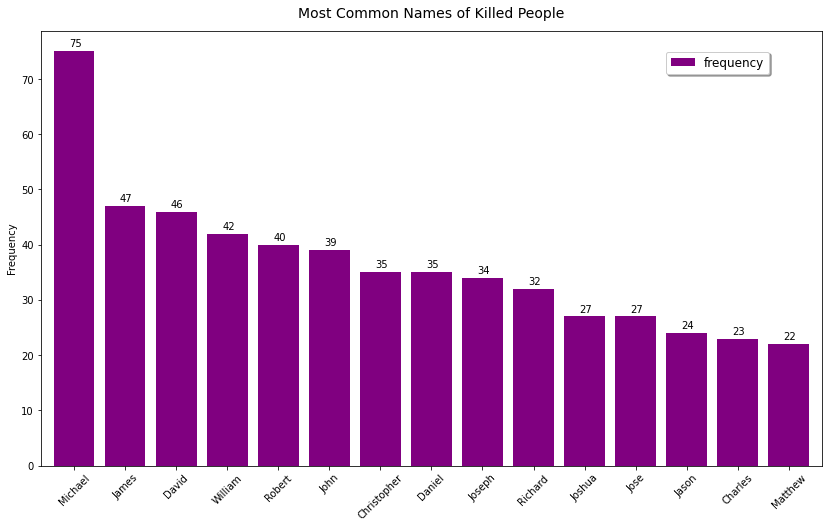

In [48]:
# with pandas

fig, ax = plt.subplots(figsize=(14,8))

names.plot(rot=45, kind='bar', ax=ax, width=0.8, color='purple', label='frequency')

ax.set_ylabel('Frequency')
ax.set_title('Most Common Names of Killed People', pad=13, fontsize=14)
ax.set_xticklabels(names.index, rotation=45)
ax.legend(shadow=True, fontsize='large', loc=(0.8, 0.9))

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.8));

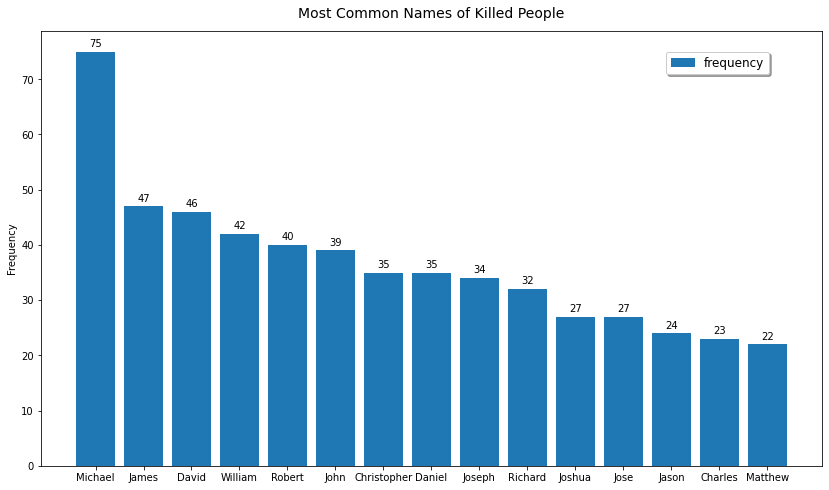

In [49]:
# with matplotlib

fig, ax = plt.subplots(figsize=(14,8))

x = names.index
y = names

a = ax.bar(x, y, label='frequency')

ax.bar_label(a, padding=3)
ax.set_ylabel('Frequency')
ax.set_title('Most Common Names of Killed People', pad=13, fontsize=14)
ax.legend(shadow=True, fontsize='large', loc=(0.8, 0.9));